In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# image path
image_path = 'images/cassini-interference.tif'

# read image
img = cv.imread(image_path)

# Check if the image was successfully loaded
if img is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


Image shape: (674, 674, 3)
Image Gray Shape: (674, 674)


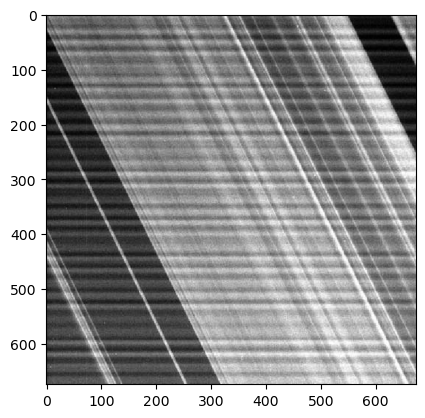

In [14]:
# Display the image
print("Image shape:", img.shape)

img_gry = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


print("Image Gray Shape:", img_gry.shape)
# Convert the image from BGR to RGB color space
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

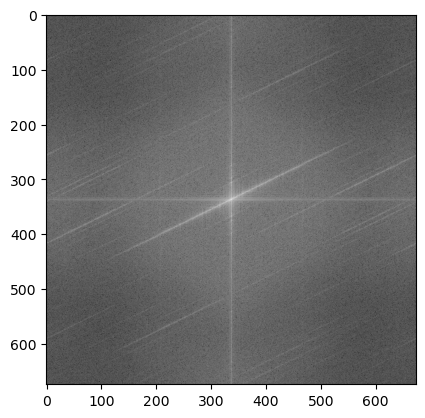

In [5]:
img_gray = np.float32(img_gry)

img_dft = cv.dft(img_gray, flags=cv.DFT_COMPLEX_OUTPUT)

img_dft_shift = np.fft.fftshift(img_dft)

img_magnitude_spectrum = np.log(1 + cv.magnitude(img_dft_shift[:,:,0], img_dft_shift[:,:,1]))

plt.imshow(img_magnitude_spectrum, cmap='gray')
plt.show()

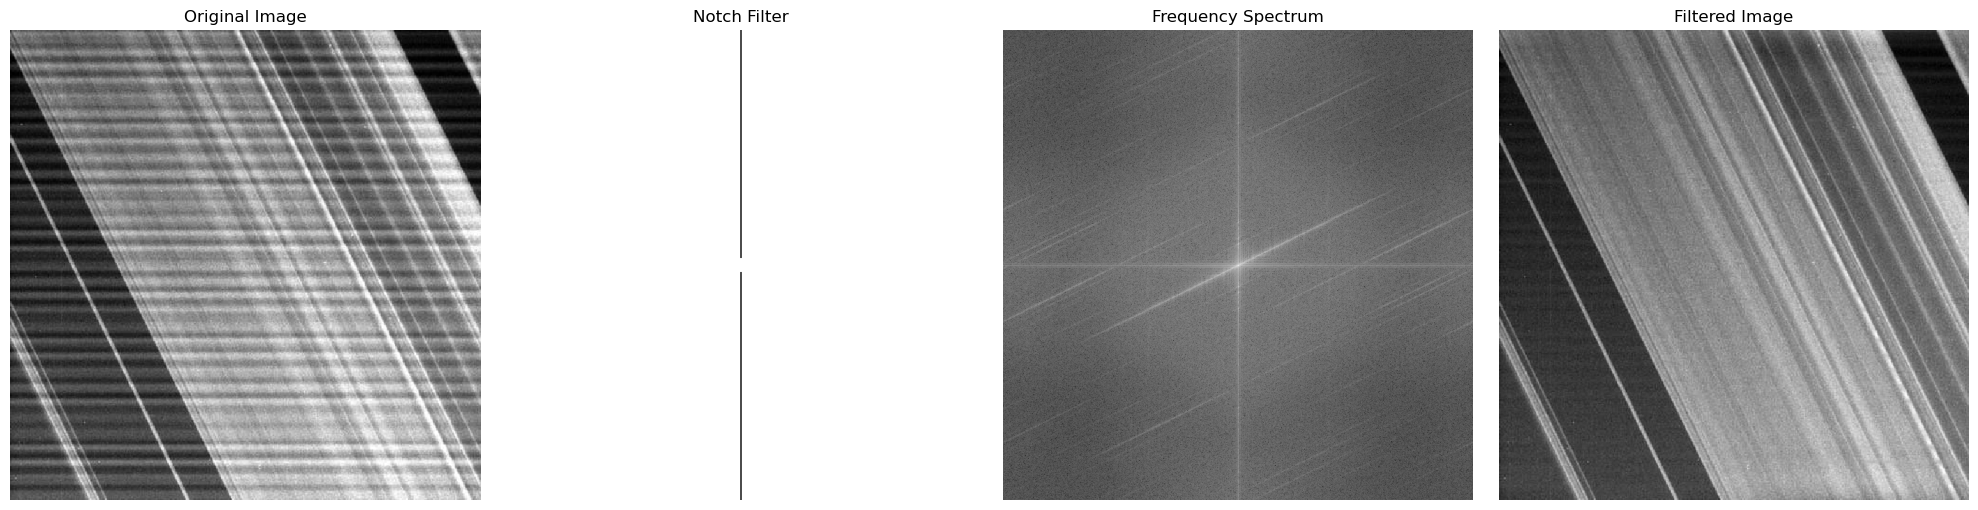

In [39]:
# Get image dimensions
rows, cols = img_gry.shape
center_row, center_col = rows//2, cols//2

# Create coordinate grid
y, x = np.ogrid[-center_row:rows-center_row, -center_col:cols-center_col]

# Create vertical notch reject filter
width = 1  # width of notch_filte
height = 10

notch_filter = np.ones((rows, cols))
notch_filter[0:center_row-height, center_col-width:center_col+width] = 0  # Top portion
notch_filter[center_row+height:, center_col-width:center_col+width] = 0   

# Apply FFT to image
f = np.fft.fft2(img_gry.astype(float))
fshift = np.fft.fftshift(f)

# Apply notch filter
filtered_shift = fshift * notch_filter

# Inverse FFT
f_ishift = np.fft.ifftshift(filtered_shift)
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

# Normalize the result
img_filtered = cv.normalize(img_filtered, None, 0, 255, cv.NORM_MINMAX)

# Display results
plt.figure(figsize=(20, 5))

# Original image
plt.subplot(141)
plt.imshow(img_gry, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Show the filter
plt.subplot(142)
plt.imshow(notch_filter, cmap='gray')
plt.title('Notch Filter')
plt.axis('off')

# Frequency spectrum
plt.subplot(143)
magnitude_spectrum = np.log(1 + np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Spectrum')
plt.axis('off')

# Filtered image
plt.subplot(144)
plt.imshow(img_filtered.astype(np.uint8), cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()